In [2]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv("spam.csv", encoding='latin-1')

data = data[['v1', 'v2']]
data.columns = ['label', 'message']

print("Dataset size:", data.shape)
data.head()


Dataset size: (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data['message'] = data['message'].apply(clean_text)


In [5]:
stop_words = set(stopwords.words('english'))

data['message'] = data['message'].apply(
    lambda x: " ".join(word for word in x.split() if word not in stop_words)
)


In [6]:
X = data['message']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


In [8]:
nb_cv = MultinomialNB()
nb_cv.fit(X_train_cv, y_train)

y_pred_nb_cv = nb_cv.predict(X_test_cv)

print("Naive Bayes (CountVectorizer) Accuracy:",
      accuracy_score(y_test, y_pred_nb_cv))


Naive Bayes (CountVectorizer) Accuracy: 0.9802690582959641


In [9]:
lr_cv = LogisticRegression(max_iter=1000)
lr_cv.fit(X_train_cv, y_train)

y_pred_lr_cv = lr_cv.predict(X_test_cv)

print("Logistic Regression (CountVectorizer) Accuracy:",
      accuracy_score(y_test, y_pred_lr_cv))


Logistic Regression (CountVectorizer) Accuracy: 0.9775784753363229


In [10]:
svm_cv = SVC()
svm_cv.fit(X_train_cv, y_train)

y_pred_svm_cv = svm_cv.predict(X_test_cv)

print("SVM (CountVectorizer) Accuracy:",
      accuracy_score(y_test, y_pred_svm_cv))


SVM (CountVectorizer) Accuracy: 0.9748878923766816


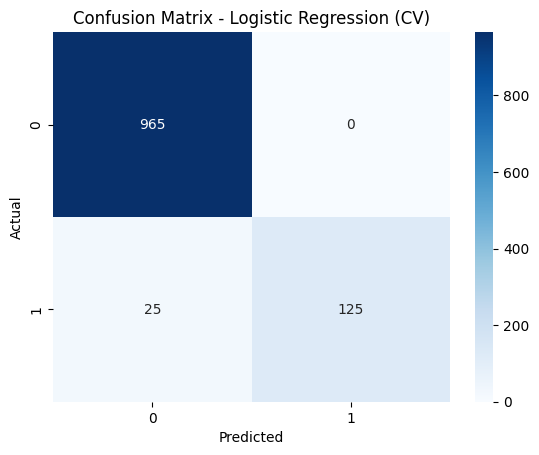

In [11]:
cm = confusion_matrix(y_test, y_pred_lr_cv)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (CV)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [13]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)

print("Naive Bayes (TF-IDF) Accuracy:",
      accuracy_score(y_test, y_pred_nb_tfidf))


Naive Bayes (TF-IDF) Accuracy: 0.967713004484305


In [14]:
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train)

y_pred_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

print("Logistic Regression (TF-IDF) Accuracy:",
      accuracy_score(y_test, y_pred_lr_tfidf))


Logistic Regression (TF-IDF) Accuracy: 0.9497757847533632


In [15]:
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)

y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)

print("SVM (TF-IDF) Accuracy:",
      accuracy_score(y_test, y_pred_svm_tfidf))


SVM (TF-IDF) Accuracy: 0.9757847533632287


In [16]:
print(classification_report(y_test, y_pred_lr_tfidf))


              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.96      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115



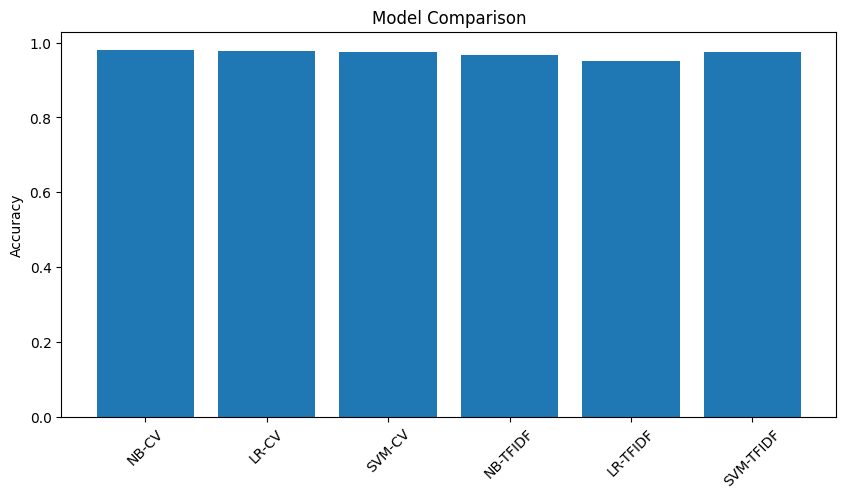

In [17]:
models = [
    "NB-CV", "LR-CV", "SVM-CV",
    "NB-TFIDF", "LR-TFIDF", "SVM-TFIDF"
]

accuracies = [
    accuracy_score(y_test, y_pred_nb_cv),
    accuracy_score(y_test, y_pred_lr_cv),
    accuracy_score(y_test, y_pred_svm_cv),
    accuracy_score(y_test, y_pred_nb_tfidf),
    accuracy_score(y_test, y_pred_lr_tfidf),
    accuracy_score(y_test, y_pred_svm_tfidf)
]

plt.figure(figsize=(10,5))
plt.bar(models, accuracies)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [18]:
feature_names = tfidf.get_feature_names_out()
coefficients = lr_tfidf.coef_[0]

top_spam = np.argsort(coefficients)[-10:]
top_ham = np.argsort(coefficients)[:10]

print("Top Spam Words:")
for index in top_spam:
    print(feature_names[index])

print("\nTop Ham Words:")
for index in top_ham:
    print(feature_names[index])


Top Spam Words:
service
prize
text
reply
call
mobile
free
stop
claim
txt

Top Ham Words:
ltgt
im
ill
ok
sir
come
later
da
going
got
